SAVING ANIMATION
✓ Saved as 'flavonoid_diffusion.gif'
✓ Saved as 'flavonoid_diffusion.mp4'


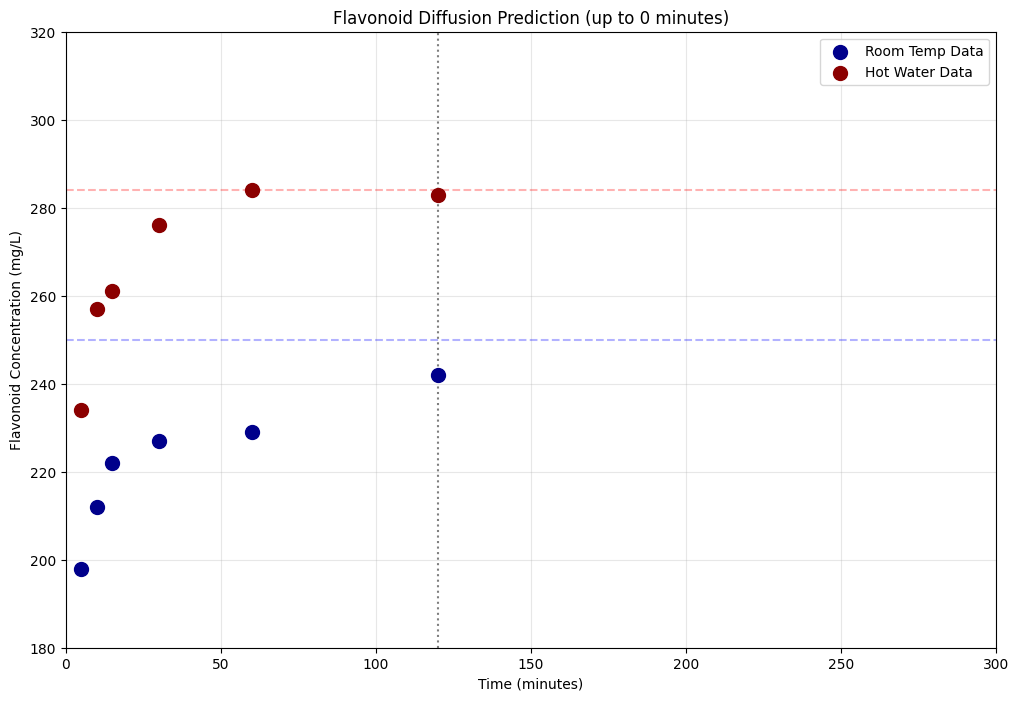

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import curve_fit

# Data setup

time_points = np.array([5, 10, 15, 30, 60, 120])  # minutes
room_temp_mass = np.array([198, 212, 222, 227, 229, 242])  # mg/L
hot_water_mass = np.array([234, 257, 261, 276, 284, 283])  # mg/L

# Define saturation model

def saturation_model(t, max_conc, k_rate, initial):
    return max_conc - (max_conc - initial) * np.exp(-k_rate * t)

# Initial guesses
room_initial_guess = [280, 0.02, 190]
hot_initial_guess = [290, 0.05, 230]

# Fit models
try:
    popt_room, _ = curve_fit(
        saturation_model, time_points, room_temp_mass,
        p0=room_initial_guess,
        bounds=([250, 0.005, 180], [350, 0.1, 210]),
        maxfev=5000
    )
    popt_hot, _ = curve_fit(
        saturation_model, time_points, hot_water_mass,
        p0=hot_initial_guess,
        bounds=([280, 0.01, 220], [320, 0.2, 240]),
        maxfev=5000
    )
except:
    # fallback values
    popt_room = [280, 0.015, 195]
    popt_hot = [290, 0.035, 230]

# Generate predictions

time_extended = np.linspace(0, 300, 500)
room_pred = saturation_model(time_extended, *popt_room)
hot_pred = saturation_model(time_extended, *popt_hot)


# Animation function

def animate_simple(frame):
    ax.clear()

    # Progressively reveal predictions
    end_time = (frame / 100) * 300  # 100 frames = full 300 minutes
    mask = time_extended <= end_time

    if np.sum(mask) > 1:
        ax.plot(time_extended[mask], room_pred[mask], 'b-', linewidth=3, label='Room Temp Prediction')
        ax.plot(time_extended[mask], hot_pred[mask], 'r-', linewidth=3, label='Hot Water Prediction')

    # Always show raw data
    ax.scatter(time_points, room_temp_mass, c='darkblue', s=100, label='Room Temp Data', zorder=5)
    ax.scatter(time_points, hot_water_mass, c='darkred', s=100, label='Hot Water Data', zorder=5)

    # Reference lines
    ax.axhline(y=popt_room[0], color='blue', linestyle='--', alpha=0.3)
    ax.axhline(y=popt_hot[0], color='red', linestyle='--', alpha=0.3)
    ax.axvline(x=120, color='black', linestyle=':', alpha=0.5)

    # Formatting
    ax.set_xlim(0, 300)
    ax.set_ylim(180, 320)
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Flavonoid Concentration (mg/L)')
    ax.set_title(f'Flavonoid Diffusion Prediction (up to {end_time:.0f} minutes)')
    ax.grid(True, alpha=0.3)
    ax.legend()

    return ax.get_children()

# Build animation

fig_anim, ax = plt.subplots(figsize=(12, 8))
anim = animation.FuncAnimation(
    fig_anim,
    animate_simple,
    frames=100,
    interval=50,
    repeat=True
)

# Save animation
print("="*50)
print("SAVING ANIMATION")
print("="*50)

# Save as GIF
try:
    anim.save('flavonoid_diffusion.gif', writer='pillow', fps=20, dpi=80)
    print("✓ Saved as 'flavonoid_diffusion.gif'")
except Exception as e:
    print(f"GIF save failed: {e}")

# Save as mp4
try:
    anim.save('flavonoid_diffusion.mp4', writer='ffmpeg', fps=20, dpi=100, bitrate=1800)
    print("Saved as 'flavonoid_diffusion.mp4'")
except Exception as e:
    print(f"MP4 save failed: {e}")
